<a href="https://colab.research.google.com/github/PLOTFINDER/aaa/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for the AAA course
## **Authors**: BRETECHE Youenn & YAKOUBOV Anas
## Presentation
This notebook is a part of the AAA course. The goal is to predict the price of houses in Melbourne using a dataset from Kaggle. We will use a Linear Regression model to predict the price of the houses. Thanks to the dataset, we have several features that can be used to predict the price of the houses. We will use these features to train the model and evaluate it.

This notebook is divided into several parts in order to follow the steps needed before training the model.

For the moment, this notebook is only cleaning the data and trying to apply a Linear Regression model to the data. The next steps will be to try different models and compare them to see which one is the best for this dataset.


## 1 - Imports

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Data description

### 2.1 - Load the dataset

In [4]:
df = pd.read_csv("dataset.csv")
print(f"Dataset size: {df.shape}")

Dataset size: (13580, 21)


### 2.2 - Columns description

**Rooms**: Number of rooms

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2**: Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size

**BuildingArea**: Building Size

**CouncilArea**: Governing council for the area

### 2.3 - Overall info

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### 2.4 - Numerical features

In [8]:
numerical_features = df.select_dtypes(include=["int64", "float64"])
numerical_features

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


### 2.5 - Categorical features

In [9]:
categorical_features = df.select_dtypes(include=["object"])
categorical_features

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,NaN,South-Eastern Metropolitan
13576,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,NaN,Western Metropolitan
13577,Williamstown,83 Power St,h,S,Raine,26/08/2017,NaN,Western Metropolitan
13578,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,NaN,Western Metropolitan


## 3 - Data preprocessing

### 3.1 - Missing values
We check all the columns for missing values

In [10]:
numerical_features.isna().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
Car                62
Price               0
Rooms               0
Bedroom2            0
Postcode            0
Distance            0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [11]:
categorical_features.isna().sum().sort_values(ascending=False)

CouncilArea    1369
Suburb            0
Type              0
Address           0
Method            0
SellerG           0
Date              0
Regionname        0
dtype: int64

**RESULT** : We can see that columns `Car`, `BuildingArea`, `YearBuilt` and `CouncilArea` have missing values.
Let's see the proportion of missing value in those features.

In [12]:
(numerical_features.isna().sum() * 100 / numerical_features.isna().count()).sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
Car               0.456554
Price             0.000000
Rooms             0.000000
Bedroom2          0.000000
Postcode          0.000000
Distance          0.000000
Bathroom          0.000000
Landsize          0.000000
Lattitude         0.000000
Longtitude        0.000000
Propertycount     0.000000
dtype: float64

In [13]:
(categorical_features.isna().sum() * 100 / categorical_features.isna().count()).sort_values(ascending=False)

CouncilArea    10.081001
Suburb          0.000000
Type            0.000000
Address         0.000000
Method          0.000000
SellerG         0.000000
Date            0.000000
Regionname      0.000000
dtype: float64

We can see that the `BuildingArea`, `YearBuilt` and `CouncilArea` columns have respectively 47.5%, 39.6% and 10.1% of missing values. We will **remove** those columns since they have too many missing values.

In the case of the `Car` column, we will use the most frequent value to fill the missing values.

In [14]:
numerical_features = numerical_features.drop(columns=["BuildingArea", "YearBuilt"])
categorical_features = categorical_features.drop(columns=["CouncilArea"])

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [15]:
numerical_features["Car"].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [16]:
numerical_features["Car"] = numerical_features["Car"].fillna(numerical_features["Car"].mode()[0])

numerical_features.isna().sum().sort_values(ascending=False)

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

### 3.2 - Handling categorical features

We will look at the number of unique value, in order to eliminate no relevant features.

In [17]:
categorical_features.nunique().sort_values(ascending=False)

Address       13378
Suburb          314
SellerG         268
Date             58
Regionname        8
Method            5
Type              3
dtype: int64

We remove categorical features that have too many unique values. In our case, we will remove the `Address`, `Suburb` and `SellerG` columns.

In [18]:
categorical_features = categorical_features.drop(columns=["Address", "Suburb", "SellerG"])

## 4 - Data visualization

### 4.1 - Data distribution

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

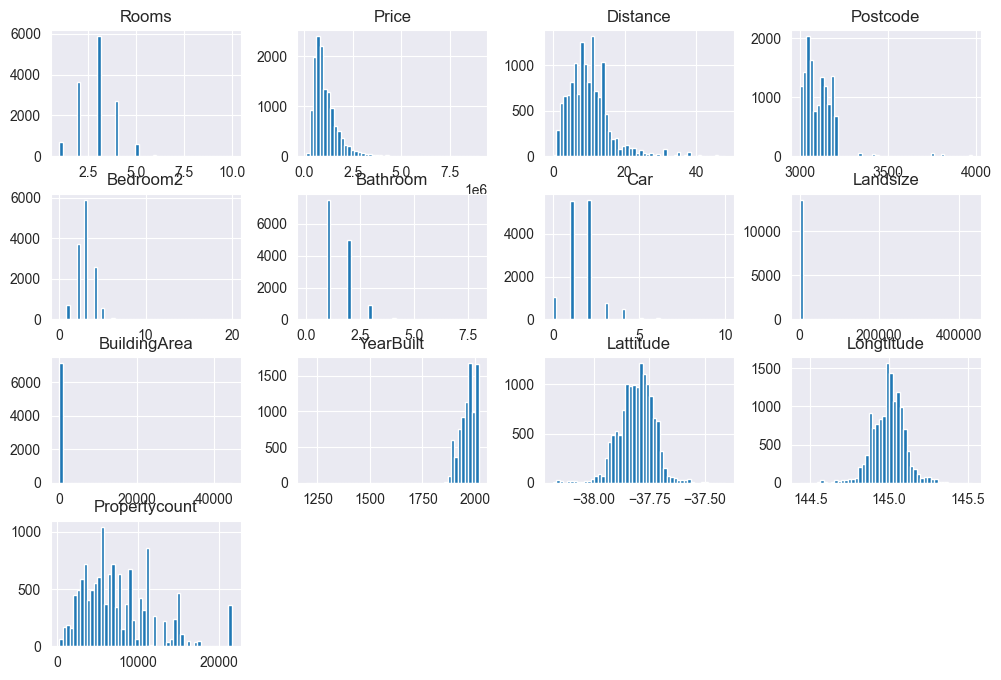

In [19]:
df.hist(bins=50, figsize=(12, 8))

In [20]:
df["Landsize"].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

It seems that the `Landsize` column has some outliers. We will remove the column because it has too many values that are too high compared to the rest of the data. It could affect the model's performance.

In [21]:
numerical_features = numerical_features.drop(columns=["Landsize"])

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

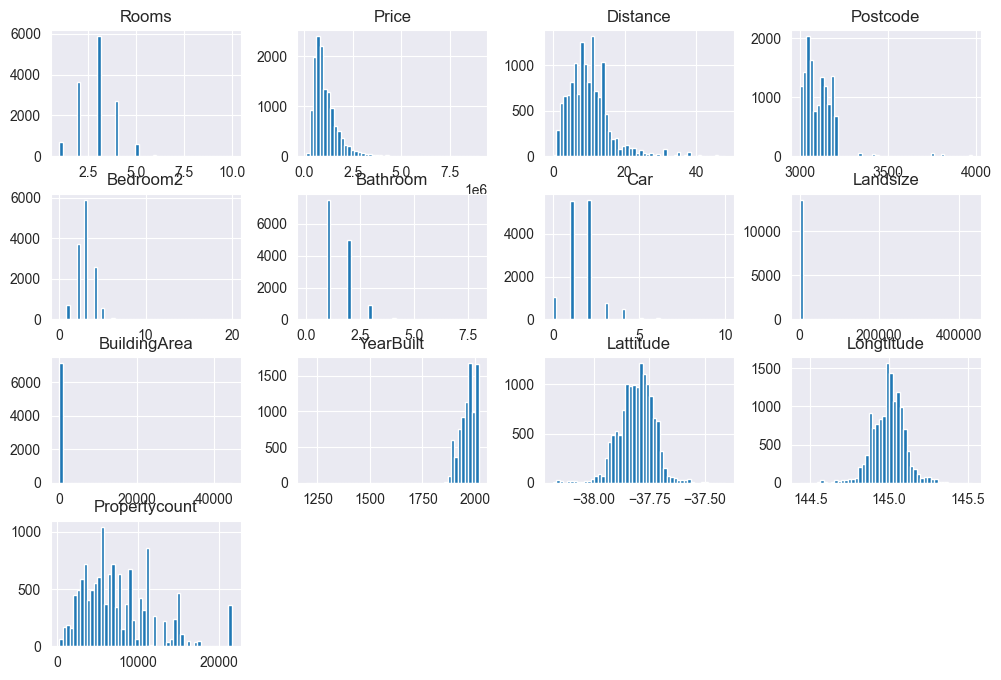

In [22]:
df.hist(bins=50, figsize=(12, 8))

### 4.2 - Data correlation
Let's visualize the correlation matrix using a heatmap

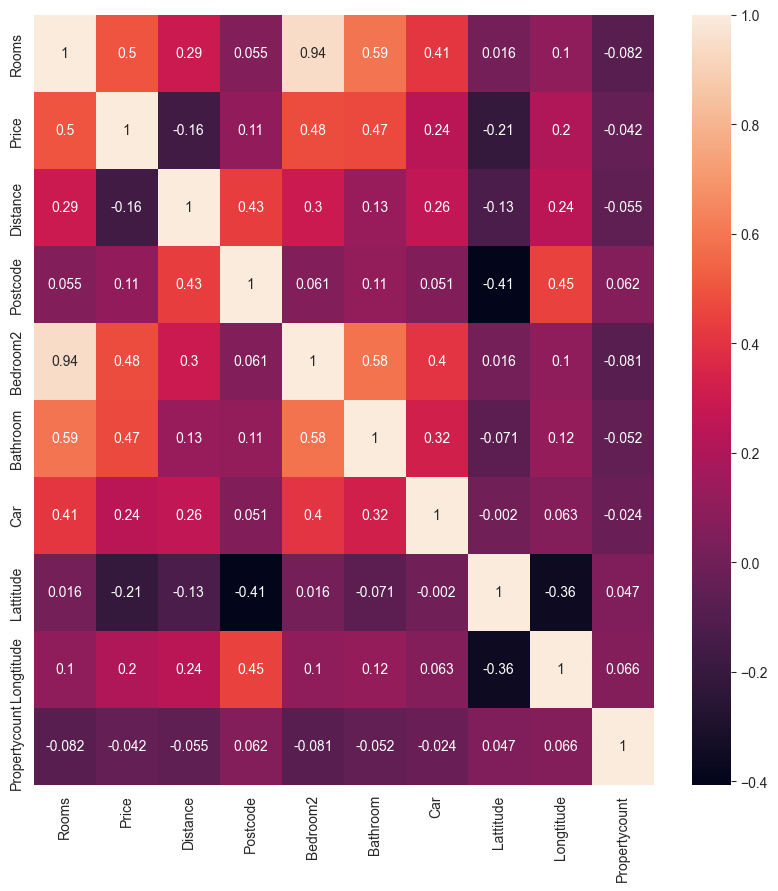

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

We can see that `Rooms` and `Bedroom2` are highly correlated. This may be due to the fact that a bedroom is actually a room. So if there is more bedroom, there will be more rooms in total.

But also that `Propertycount` and `Distance` are negatively correlated with `Price`, so they might be good predictors.

We can also see that `Price` is highly correlated with `Rooms`, `Bedroom2` and `bathroom` which makes sense since the more rooms a house has the more expensive it is.

### 4.3 - Data correlation distribution

Let's also visualize the scatter matrix of the numerical features.
It will help us see the distribution of the data.

array([[<Axes: xlabel='Rooms', ylabel='Rooms'>,
        <Axes: xlabel='Price', ylabel='Rooms'>,
        <Axes: xlabel='Distance', ylabel='Rooms'>,
        <Axes: xlabel='Postcode', ylabel='Rooms'>,
        <Axes: xlabel='Bedroom2', ylabel='Rooms'>,
        <Axes: xlabel='Bathroom', ylabel='Rooms'>,
        <Axes: xlabel='Car', ylabel='Rooms'>,
        <Axes: xlabel='Lattitude', ylabel='Rooms'>,
        <Axes: xlabel='Longtitude', ylabel='Rooms'>,
        <Axes: xlabel='Propertycount', ylabel='Rooms'>],
       [<Axes: xlabel='Rooms', ylabel='Price'>,
        <Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Distance', ylabel='Price'>,
        <Axes: xlabel='Postcode', ylabel='Price'>,
        <Axes: xlabel='Bedroom2', ylabel='Price'>,
        <Axes: xlabel='Bathroom', ylabel='Price'>,
        <Axes: xlabel='Car', ylabel='Price'>,
        <Axes: xlabel='Lattitude', ylabel='Price'>,
        <Axes: xlabel='Longtitude', ylabel='Price'>,
        <Axes: xlabel='Propertycount', yl

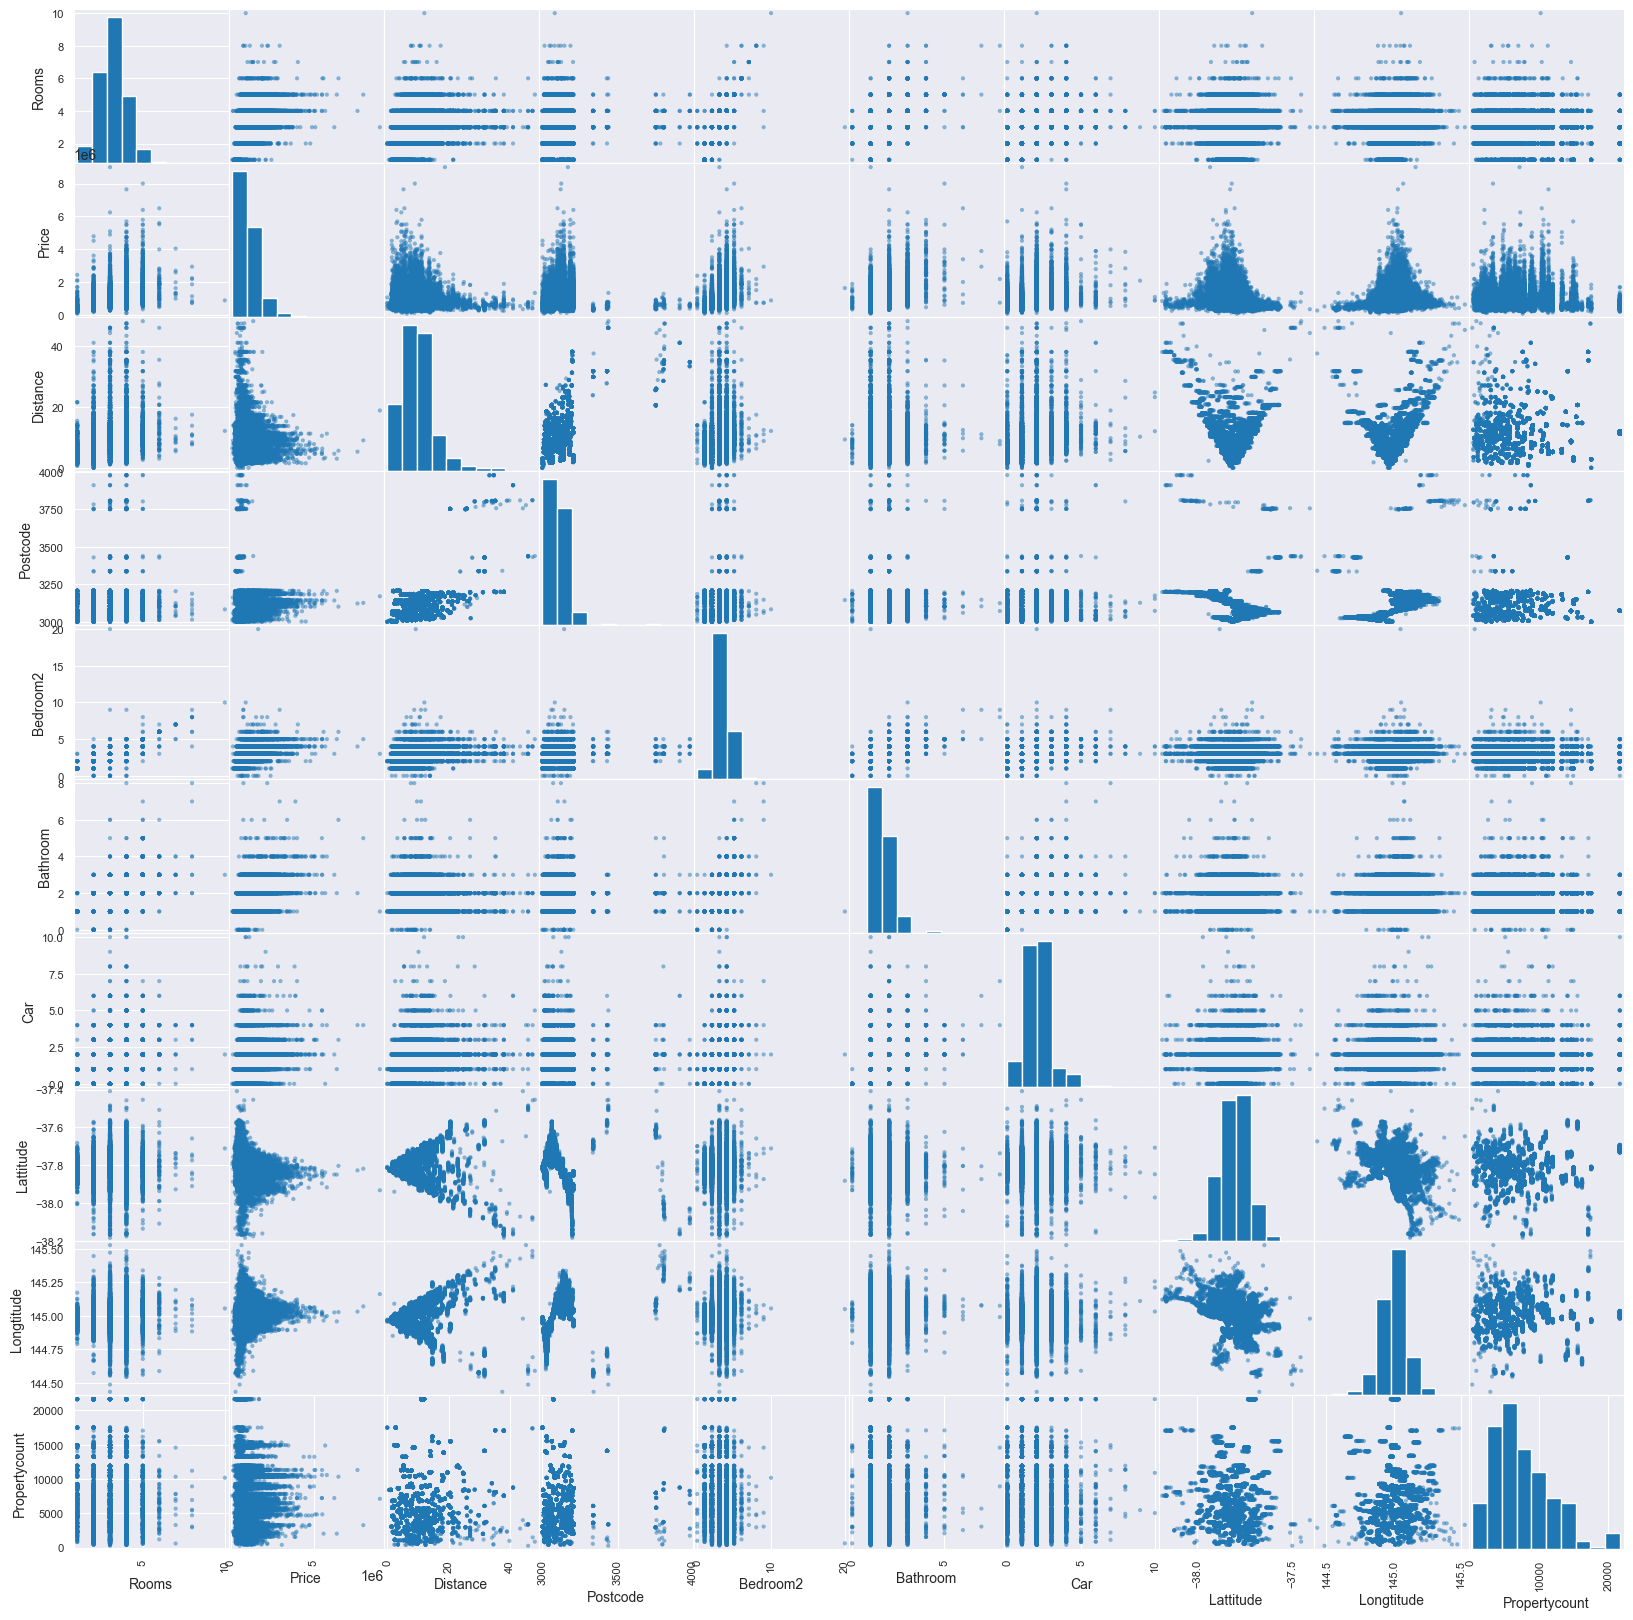

In [24]:
scatter_matrix(numerical_features, figsize=(20, 20))

Thoses graph allows us to depict the same conclusion about feature correlation. However, we can also see that `Landsize` has a long tail distribution, which means that there are some outliers in the data.

### 4.4 - Price repartition map

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

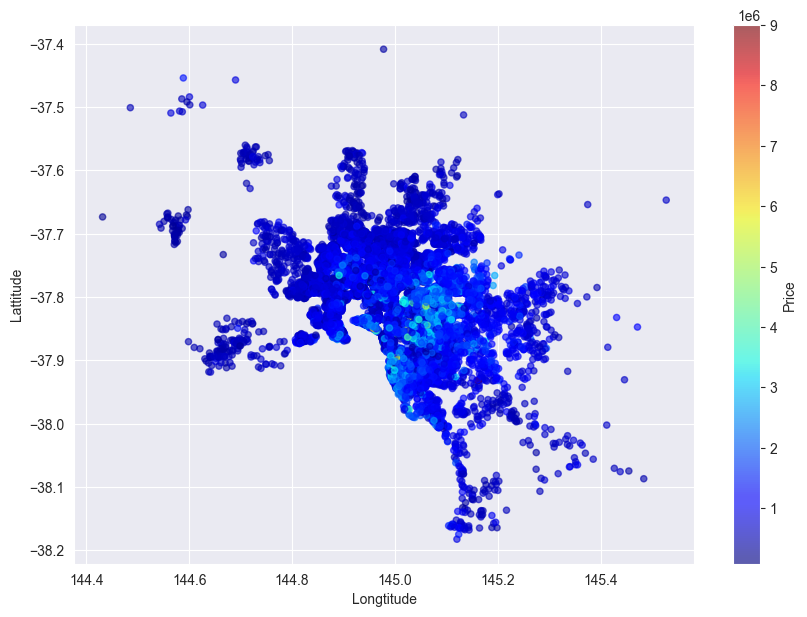

In [41]:
df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.6, figsize=(10, 7), c="Price", cmap=plt.get_cmap("jet"),
        colorbar=True)

In [26]:
# # numerical_features.remove("Lattitude")
# # numerical_features.remove("Longtitude")
# numerical_features.remove("Propertycount")
# # numerical_features.remove("Distance")
# numerical_features.remove("Postcode")

numerical_features = numerical_features.drop(columns=["Propertycount", "Postcode"])
numerical_features

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude
0,2,1480000.0,2.5,2.0,1.0,1.0,-37.79960,144.99840
1,2,1035000.0,2.5,2.0,1.0,0.0,-37.80790,144.99340
2,3,1465000.0,2.5,3.0,2.0,0.0,-37.80930,144.99440
3,3,850000.0,2.5,3.0,2.0,1.0,-37.79690,144.99690
4,4,1600000.0,2.5,3.0,1.0,2.0,-37.80720,144.99410
...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,4.0,2.0,2.0,-37.90562,145.16761
13576,3,1031000.0,6.8,3.0,2.0,2.0,-37.85927,144.87904
13577,3,1170000.0,6.8,3.0,2.0,4.0,-37.85274,144.88738
13578,4,2500000.0,6.8,4.0,1.0,5.0,-37.85908,144.89299


## Conclusion
Now that our data are cleaned, we can start applying transformations to them and train the model.
This will be done later in the following steps of the notebook.

## 5 - Applying transformations, training the model and evaluating it

### 5.1 - Pipeline creation
We create a pipeline to apply the transformations to the data

#### 5.1.1 - Transformation des données

In [27]:
numerical_features_names = numerical_features.columns.to_list()
numerical_features_names.remove("Price")
categorical_features_names = categorical_features.columns.to_list()

numerical_features_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
], verbose=True)

categorical_features_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
    # ("encoder", OrdinalEncoder())
], verbose=True)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_features_transformer, numerical_features_names),
        ("cat", categorical_features_transformer, categorical_features_names)
    ]
)


#### 5.1.2 - Choix des modèles

`Linear regression` : Suitable for capturing linear relationships between house features and price. It's fast, interpretable, and provides a good baseline for the project. However, it may struggle with complex interactions and outliers.

`Decision tree` : Suitable for capturing linear relationships between house features and price. It's fast, interpretable, and provides a good baseline for the project. However, it may struggle with complex interactions and outliers.

`Random forest` : Suitable for capturing linear relationships between house features and price. It's fast, interpretable, and provides a good baseline for the project. However, it may struggle with complex interactions and outliers.

In [ ]:
# We also need to define the classifier, which in this case is a Linear Regression model
linear_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])
decision_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=69))
])
random_forest = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=69))
])
# classifier = LogisticRegression()
# classifier = DecisionTreeRegressor()

pipelines = {
    "linear_reg": linear_reg,
    "decision_tree": decision_tree,
    "random_forest": random_forest
}

# Now we have a pipeline that can apply the transformations to the data

### 5.2 - Training and testing sets
Splitting the data into training and testing sets

In [28]:
df.shape

(13580, 21)

In [29]:
target = numerical_features["Price"]
housing_numerical = numerical_features.drop(columns=["Price"])
housing_categorical = categorical_features
# append numerical and categorical features
housing = pd.concat([housing_numerical, housing_categorical], axis=1)

housing.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Type,Method,Date,Regionname
0,2,2.5,2.0,1.0,1.0,-37.7996,144.9984,h,S,3/12/2016,Northern Metropolitan
1,2,2.5,2.0,1.0,0.0,-37.8079,144.9934,h,S,4/02/2016,Northern Metropolitan
2,3,2.5,3.0,2.0,0.0,-37.8093,144.9944,h,SP,4/03/2017,Northern Metropolitan
3,3,2.5,3.0,2.0,1.0,-37.7969,144.9969,h,PI,4/03/2017,Northern Metropolitan
4,4,2.5,3.0,1.0,2.0,-37.8072,144.9941,h,VB,4/06/2016,Northern Metropolitan


#### 5.2.1 - Dataset sizes

In [30]:
test_size = 0.2  # 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(housing, target, test_size=test_size)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training target size: {y_train.shape}")
print(f"Testing target size: {y_test.shape}")
X_train.head()

Training set size: (10864, 11)
Testing set size: (2716, 11)
Training target size: (10864,)
Testing target size: (2716,)


,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Type,Method,Date,Regionname
11151,3,21.5,3.0,2.0,2.0,-37.98703,145.09131,h,S,12/08/2017,South-Eastern Metropolitan
2391,2,8.0,2.0,1.0,2.0,-37.74860,144.90720,u,VB,15/10/2016,Western Metropolitan
1881,2,3.4,2.0,1.0,1.0,-37.79340,144.99220,h,S,4/06/2016,Northern Metropolitan
3218,3,4.6,3.0,2.0,1.0,-37.81590,145.02190,h,PI,28/08/2016,Southern Metropolitan
4041,4,11.8,3.0,2.0,1.0,-37.81970,145.11060,h,S,18/06/2016,Eastern Metropolitan


In [44]:
y_train.head()

11151    1051000.0
2391      520000.0
1881      780000.0
3218     1400000.0
4041     2000000.0
Name: Price, dtype: float64

In [43]:
y_train.describe()

count    1.086400e+04
mean     1.070819e+06
std      6.354384e+05
min      8.500000e+04
25%      6.453000e+05
50%      9.000000e+05
75%      1.327125e+06
max      9.000000e+06
Name: Price, dtype: float64

In [46]:
print(y_train.min())
print(y_train.max())

85000.0
9000000.0


In [45]:
X_train.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Type,Method,Date,Regionname
11151,3,21.5,3.0,2.0,2.0,-37.98703,145.09131,h,S,12/08/2017,South-Eastern Metropolitan
2391,2,8.0,2.0,1.0,2.0,-37.74860,144.90720,u,VB,15/10/2016,Western Metropolitan
1881,2,3.4,2.0,1.0,1.0,-37.79340,144.99220,h,S,4/06/2016,Northern Metropolitan
3218,3,4.6,3.0,2.0,1.0,-37.81590,145.02190,h,PI,28/08/2016,Southern Metropolitan
4041,4,11.8,3.0,2.0,1.0,-37.81970,145.11060,h,S,18/06/2016,Eastern Metropolitan


### 6 - Evaluating models

#### 6.1 - Evaluation by MAE

In [35]:
from sklearn.model_selection import cross_val_score

for name, pipeline in pipelines.items():
    mae_score = -1 * cross_val_score(pipeline, X_train, y_train, cv=5, n_jobs=1, scoring='neg_mean_absolute_error')
    print(f'{name} MAE: {mae_score.mean()}')

[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
linear_reg MAE: 271060.4021653969
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Proces

#### 6.2 - Evalution by MAE and Score

In [36]:
from sklearn.metrics import mean_absolute_error

models_summary = []

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    score = pipeline.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} score: {score}')
    print(f'{name} MAE: {mae}')

    models_summary.append({
        "name": name,
        "score": score,
        "mae": mae
    })



[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
linear_reg score: 0.602275763215318
linear_reg MAE: 278838.44256640435
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
decision_tree score: 0.44625434043892687
decision_tree MAE: 265639.2522091311
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
[Pipeline] ........... (step 1 of 1) Processing encoder, total=   0.0s
random_forest score: 0.7219585122452559
random_forest MAE: 203775.54624570443


In [37]:
models_summary = pd.DataFrame(models_summary).sort_values(by="score", ascending=False)
models_summary

,name,score,mae
2,random_forest,0.721959,203775.546246
0,linear_reg,0.602276,278838.442566
1,decision_tree,0.446254,265639.252209


**RESULTS** : As we can see, random forest is the best model in our case. However, the score is still low with 0,72.

### Hyperparameter tuning

We will use GridSearchCV to find the best hyperparameters for the Random Forest model.

In [38]:
params = {
    'model__n_estimators': [110, 120, 130, 140],
    'model__max_depth': [ 7, 9],
}

print(random_forest)

grid_search = GridSearchCV(estimator=random_forest, param_grid=params, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
score = grid_search.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print(f'Best score: {score}')
print(f'Best MAE: {mae}')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())],
                                                           verbose=True),
                                                  ['Rooms', 'Distance',
                                                   'Bedroom2', 'Bathroom',
                                                   'Car', 'Lattitude',
                                                   'Longtitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))],
                                                           verbose=True),
                                                  ['Type', 'Method', 

KeyboardInterrupt: 

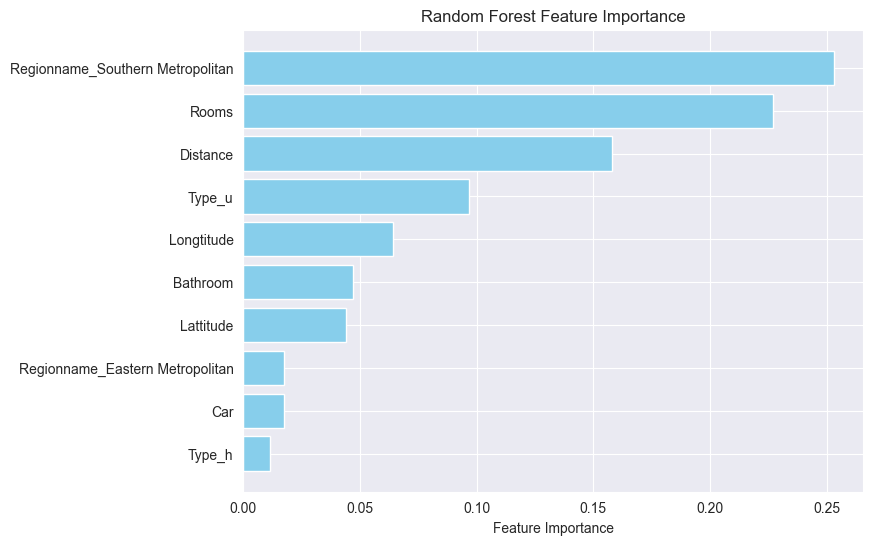

In [1901]:
rf_best = grid_search.best_estimator_

def get_feature_names_from_pipeline(pipeline):
    preprocessor = pipeline.named_steps['preprocessor']
    feature_name_list = []
    for name, transformer, cols in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            transformed_names = transformer.get_feature_names_out(cols)
            feature_name_list.extend(transformed_names)
        else:
            if cols is not None and cols != 'drop':
                feature_name_list.extend(cols)
    # Ensure the feature names match the model input
    return feature_name_list


rf_model = rf_best.named_steps['model']
rf_features = get_feature_names_from_pipeline(rf_best)

rf_importances = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_importances
}).sort_values('Importance', ascending=False)

# only show the top 10 features
rf_importance_df = rf_importance_df.head(10)

plt.figure(figsize=(8, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()